# Solving a Stochastic New-Keynesian Model

> Model project for "Introduction to Programming and Numerical Analysis" 
> - Group: "a-j"

# Table of Contents

[Table of Contents](#Table-of-contents)

[Preliminaries](#Preliminaries)

[Model description](#Model-description)

[Numerical solution](#Numerical-solution)

[Assumptions and parameters](##Assumptions-and-parameters)

[Further analysis](#Further-analysis)

[Conclusion](#Conclusion)

This project seeks to develop and simulate a simple stochastic New-Keynesian model, exploring economic dynamics over 10 periods. By incorporating output as a factor in the Taylor rule, we extend the traditional model to analyze the implications with a greater degree of nuance. The comparison of key economic indicators—output, inflation, and interest rates—under different policy scenarios offers valuable insights into how these adjustments can influence economic stability.

# Preliminaries

In [6]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject
model = modelproject.NewKeynesianModel()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

## A stochastic New-Keynesian Model

This project is based on a simple 3-equation New-Keynesian model with continuous stochastic shocks. The three central equations of the model are as follows:

**1. Dynamic IS-equation:**

$$y_t = \mathbb{E}_t\left[y_{t+1}\right] - \frac{1}{\sigma} \left(i_t - \mathbb{E}_t \left[\pi_{t+1}\right]\right),$$

where $y_t$ is output at time t, $\mathbb{E}_t\left[y_{t+1}\right]$ is the expected output in time $t+1$, $\mathbb{E}_t \left[\pi_{t+1}\right]$ is the expected inflation, $i_t$ is the nominal interest rate and $\sigma$ is the intertemporal elasticity of substitution in consumption. 

The IS-equation thereby shows how the output in the economy varies for a given interest rate, and for the expected future output and inflation rate.

**2. New-Keynesian Phillips Curve:**

The New-Keynesian Phillips Curve models the inflation rate as a function of the expected inflation rate and the output:

$$\pi_t = \beta \mathbb{E}_t\left[\pi_{t+1}\right] + \kappa (y_t - a_t),$$

where $\beta$ is the discount rate, $\kappa$ implies how sensitive the inflation is to changes in output, given by:

$$\kappa \equiv \frac{\alpha}{1 - \alpha}\left(1-\beta(1-\alpha)\right)\phi_{\pi}.$$

Furthermore, $a_t$ is an exogeneous shock to output, which follows a random-walk AR(1) process:

$$a_t = \rho a_{t-1} + \varepsilon_t^a,$$

where the stochastic variation is given by:
$$\varepsilon_t^a \sim N\left(0,\sigma_a^2\right)$$ 

**3. Taylor-Rule:**

The central bank in the economy determines the nominal interest using a simple Taylor-Rule:

$$i_t = \phi_{\pi} \pi_t + \varepsilon_t^m,$$

where $\phi_{\pi}$ determines how the centralbank sets the nominal interest rate for a given inflation rat, and $\varepsilon_t^m$ is a stochastic monetary shock given by:

$$\varepsilon_t^m \sim N\left(0,\sigma_n^2\right)$$


# Numerical solution

## Assumptions and parameters

The first thing to address before simulating the model, is how to numerically model the expected values of output and inflation. This project assumes that the households have "naive" future expectations, i.e. they expect tomorrows output and inflation to be the same values as yesterday, such that:

$$\mathbb{E}_t\left[y_{t+1}\right] = y_{t-1}$$

and

$$\mathbb{E}_t\left[\pi_{t+1}\right] = \pi_{t-1}$$

The parameters in the model are set as:

$$\sigma = 1.5, \: \beta = 0.99, \: \rho = 0.9, \: \phi_{\pi} = 1.5, \: \alpha = 0.75$$

The standard deviations for the two stochastic variables are given as:

$$\sigma_a = 1, \: \sigma_m = 0.5$$

The starting values for the endogenous values are set to be:

$$y_0 = 0.05, \: \pi_0 = 0.02, \: i_0 = 0.025$$



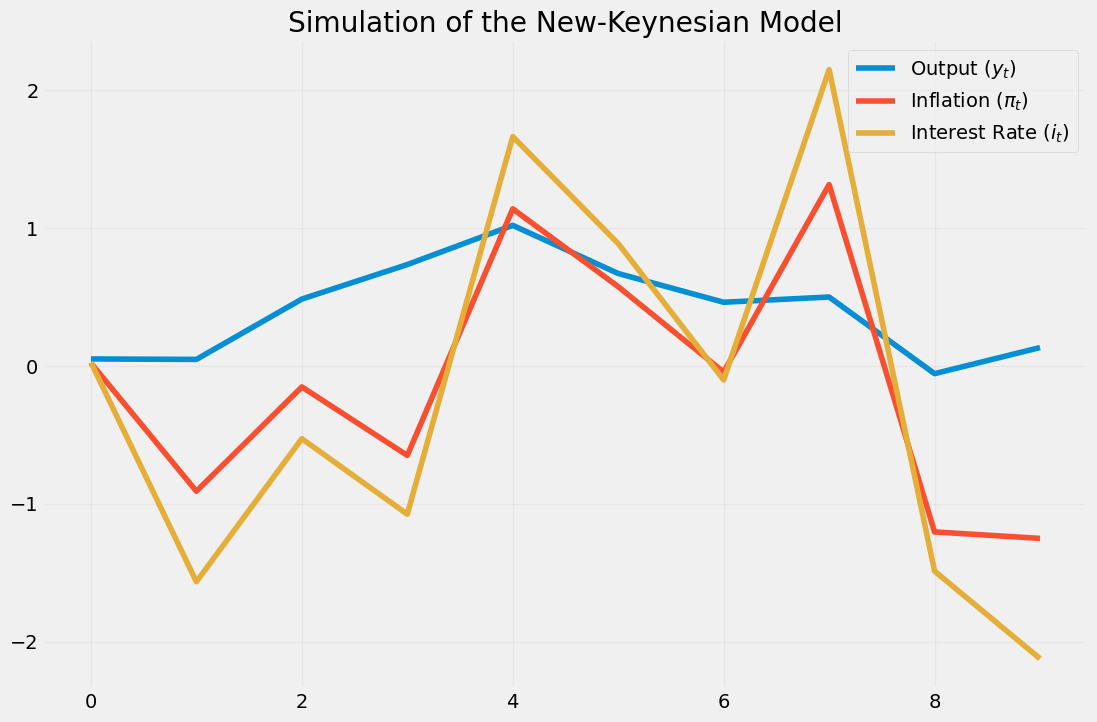

In [9]:
# Calling simulation of baseline model 
model.simulate()
model.plot_results()

Since the variables are log-linerised we cannot interpret the levels directly, but have to conclude on the relative movements of the variables.
Firstly; it looks like the output is not as volitile as the other variables, which makes sense based on the equations of the model.
Furthermore, it seems like the inflation and the interest rate follow the same rough patterns, but the interest rate seems to be slightly more volitile, since both the low and high values are numerically larger than for the inflation rate. Simply put; When inflation is high, then the interest rate follows that pattern. This makes sense in the light of a simple Taylor rule.

# Further analysis

Here we extend the model by incorporating output into the Taylor-rule of the model. This gives us the following Taylor-rule:
$$ i_t = \phi_{\pi} \pi_t + \phi_y y_t + \epsilon_{t}^m $$
And the response coefficient for output is defined as follows:
$$ \phi_y = \frac{1}{2} $$

Now the model can be simulated again and the results are presented below:

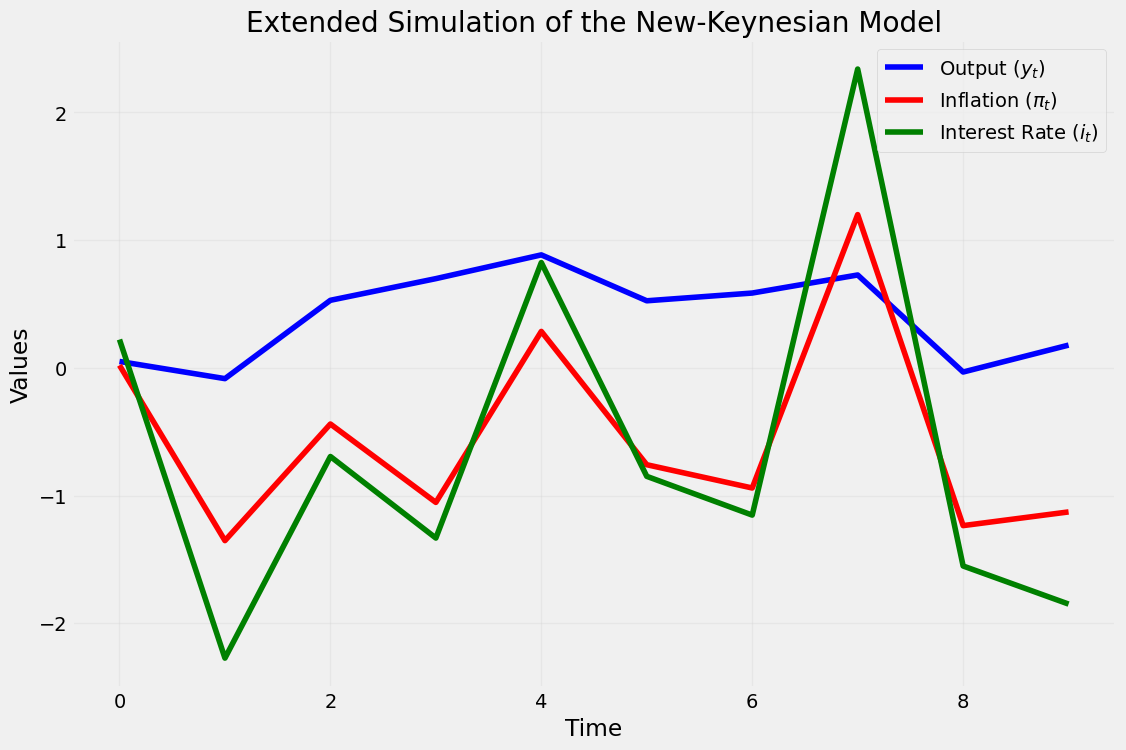

In [8]:
# Calling simulation of extended model
model.simulate_extended()
model.plot_results_extended()

In this case we make the same general conclusions on the results of the model. The central difference seems to be that there is a relatively larger gap between the inflation and interest rates, this is due to the Taylor-rule also accounting for the output-level in the economy.

# Conclusion

In this project we have sucessfully coded a simple sthocastic New-Keynesisan model for an economy, and simulated the models for 10 periods. As an extention of the model we have added the output as a factor in the Taylor-rule of the model, and have compared the reults.